# Exercícios

Vamos trabalhar com dados proveniente de duas fontes diferentes. Considere os dados do Índice de Desenvolvimento da Educação Básica (Ideb) disponíveis em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio) e os dados sobre Produto Interno Bruto (PIB) disponíveis em [PIB](https://basedosdados.org/dataset/br-ibge-pib?bdm_table=municipio).

No conjunto de dados `ideb.csv` vamos selecionar as colunas `ano`, `id_municipio`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb` provenientes dos dados do Ideb, e as colunas `pib` e `impostos_liquidos` do `pib.csv`.

In [1]:
# import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Atividade 1: Selecione apenas as colunas `ano`, `id_municipio`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb` provenientes dos dados do Ideb, apenas para o ano de 2019 e agrupado por município.

In [4]:
# read data
ideb = pd.read_csv(r'C:\Users\aurel\OneDrive\Documentos\Estudo\Sirius\1 - Estatistica descritiva I\S1D5\Data\ideb.csv', usecols = ['ano',
                                          'id_municipio',
                                          'nota_saeb_matematica',
                                          'nota_saeb_lingua_portuguesa',
                                          'ideb'])

ideb.head()

,ano,id_municipio,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,1200302,167.8,165.60,2.3
1,2005,1200328,151.8,149.60,1.8
2,2005,1200328,163.6,155.80,1.9
3,2005,1200328,159.0,153.39,1.9
4,2005,1200336,138.0,134.19,2.3


In [5]:
#transform data
ideb = ideb.query('ano == 2019')\
           .groupby('id_municipio').mean()\
           .reset_index()
           
ideb.head()

,id_municipio,ano,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,1100015,2019.0,253.283750,242.246250,5.050000
1,1100023,2019.0,248.223750,243.618750,4.762500
2,1100031,2019.0,229.495000,221.500000,4.850000
3,1100049,2019.0,259.150000,249.888889,5.200000
4,1100056,2019.0,266.288571,254.334286,5.642857


### Atividade 2: Selecione as colunas `ano`, `id_municipio`, `pib` e `impostos_liquidos` dos dados do PIB, para o ano de 2019 e agrupado por município.

In [8]:
# read data
pib = pd.read_csv(r'C:\Users\aurel\OneDrive\Documentos\Estudo\Sirius\1 - Estatistica descritiva I\S1D5\Data\pib.csv', usecols = ['ano',
                                        'id_municipio',
                                        'pib',
                                        'impostos_liquidos'])

pib.head()

,ano,id_municipio,pib,impostos_liquidos
0,2002,1100015,111290995,7549266
1,2002,1100023,449592816,42665972
2,2002,1100031,31767520,1867935
3,2002,1100049,474443097,49622951
4,2002,1100056,79173614,8200971


In [9]:
# transform data
pib = pib.query('ano == 2019')\
         .groupby('id_municipio').mean()\
         .reset_index()

pib.head()

,id_municipio,ano,pib,impostos_liquidos
0,1100015,2019.0,4.956288e+08,29350985.0
1,1100023,2019.0,2.578830e+09,284397627.0
2,1100031,2019.0,1.399594e+08,5997974.0
3,1100049,2019.0,2.260644e+09,253988284.0
4,1100056,2019.0,5.068545e+08,76671376.0


### Atividade 3: Vamos juntar os dois DataFrames em um único. Para isso, vamos "unir" os dois dataframes pela variável `id_municipio`.

In [10]:
# join data
df = pd.merge(ideb, pib, on = ['id_municipio'])
df.head()

,id_municipio,ano_x,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,ano_y,pib,impostos_liquidos
0,1100015,2019.0,253.283750,242.246250,5.050000,2019.0,4.956288e+08,29350985.0
1,1100023,2019.0,248.223750,243.618750,4.762500,2019.0,2.578830e+09,284397627.0
2,1100031,2019.0,229.495000,221.500000,4.850000,2019.0,1.399594e+08,5997974.0
3,1100049,2019.0,259.150000,249.888889,5.200000,2019.0,2.260644e+09,253988284.0
4,1100056,2019.0,266.288571,254.334286,5.642857,2019.0,5.068545e+08,76671376.0


### Atividade 4:  Verifique se há dados faltantes, além disso verifique se há alguma coluna irrelevante. Se houver, descarte-a.

In [11]:
df.isna().sum()

id_municipio                    0
ano_x                           0
nota_saeb_matematica           21
nota_saeb_lingua_portuguesa    21
ideb                           21
ano_y                           0
pib                             0
impostos_liquidos               0
dtype: int64

In [12]:
# show null values
df[df.isna().any(axis = 1)]

,id_municipio,ano_x,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,ano_y,pib,impostos_liquidos
833,2208601,2019.0,NaN,NaN,NaN,2019.0,25170709.0,1165094.0
2052,2918902,2019.0,NaN,NaN,NaN,2019.0,71455084.0,2660487.0
3026,3166600,2019.0,NaN,NaN,NaN,2019.0,19107326.0,575566.0
3891,3555703,2019.0,NaN,NaN,NaN,2019.0,44829500.0,1198001.0
4340,4202081,2019.0,NaN,NaN,NaN,2019.0,79440521.0,4064546.0
4343,4202131,2019.0,NaN,NaN,NaN,2019.0,153412908.0,4400714.0
4490,4211892,2019.0,NaN,NaN,NaN,2019.0,59911208.0,1470049.0
4639,4301750,2019.0,NaN,NaN,NaN,2019.0,143306474.0,4073862.0
4647,4302055,2019.0,NaN,NaN,NaN,2019.0,35303161.0,894877.0
4697,4304853,2019.0,NaN,NaN,NaN,2019.0,43952838.0,1130560.0


In [13]:
# Remove null values
df.dropna(inplace = True)

In [14]:
# drop columns: "ano_x" and "ano_y"
df.drop(columns = ['ano_x','ano_y'], inplace = True)

In [15]:
df.head()

,id_municipio,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,pib,impostos_liquidos
0,1100015,253.283750,242.246250,5.050000,4.956288e+08,29350985.0
1,1100023,248.223750,243.618750,4.762500,2.578830e+09,284397627.0
2,1100031,229.495000,221.500000,4.850000,1.399594e+08,5997974.0
3,1100049,259.150000,249.888889,5.200000,2.260644e+09,253988284.0
4,1100056,266.288571,254.334286,5.642857,5.068545e+08,76671376.0


### Atividade 5: Quais são os tipos das variáveis do DataFrame?

In [16]:
df.dtypes

id_municipio                     int64
nota_saeb_matematica           float64
nota_saeb_lingua_portuguesa    float64
ideb                           float64
pib                            float64
impostos_liquidos              float64
dtype: object

A variável `id_municipio` por padrão foi lida como quantitativa discreta e as demais foram classificadas como quantitativa contínua.

Porem a variável `id_municipio` é uma variável qualitativa nominal.

In [17]:
# change the data type 
df['id_municipio'] = df.id_municipio.astype('category')

In [18]:
df.dtypes

id_municipio                   category
nota_saeb_matematica            float64
nota_saeb_lingua_portuguesa     float64
ideb                            float64
pib                             float64
impostos_liquidos               float64
dtype: object

### Atividade 6: Observando as variáveis envolvidas, você acha que deve existir alguma correlação entre quais delas?

Será que municípios com alta nota no Ideb possuem um PIB alto?

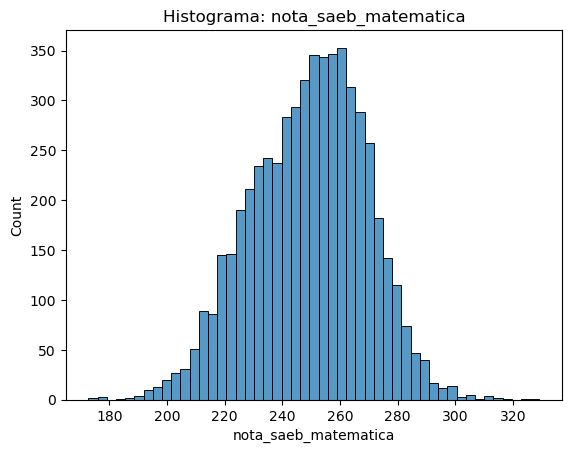

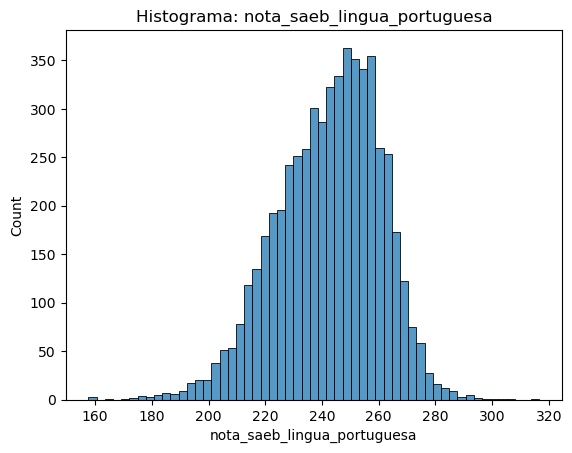

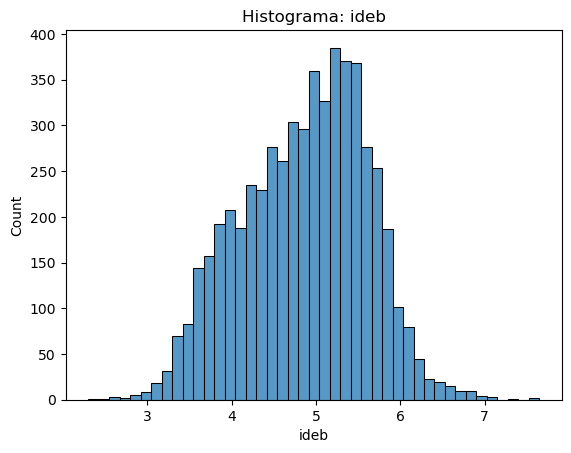

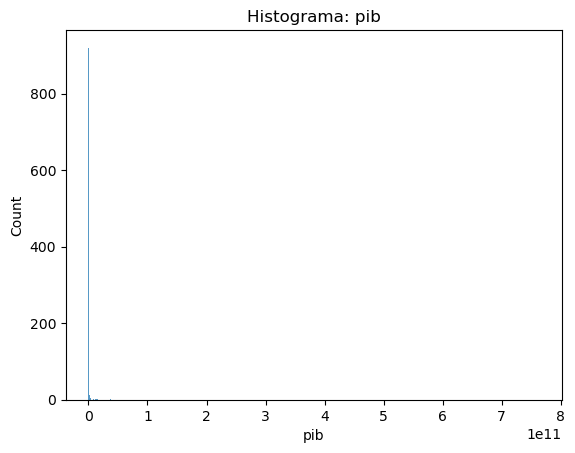

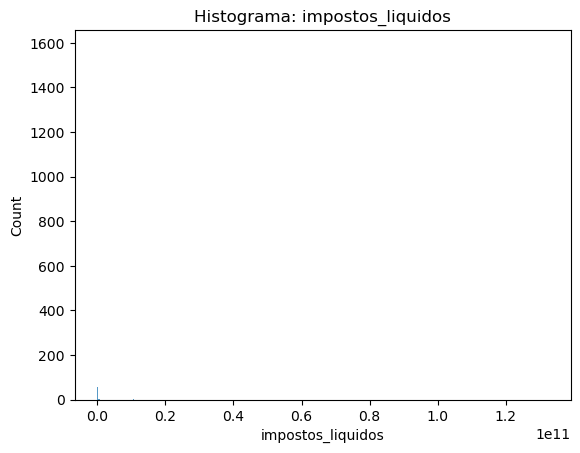

In [19]:
# plot histplot 
cols = df.select_dtypes(include = np.number)\
         .columns\
         .tolist()

for col in cols:
  ax = sns.histplot(df[col])
  ax.set(title = f'Histograma: {col}')
  plt.show()
  print()

Os dados possuem uma distribuição normal, exceto as variáveis `pib` e `impostos_liquidos` que possuem grande dispersão e valores outliers.

In [20]:
# Correlation using Pearson method
df.select_dtypes(include = np.number)\
  .corr(method='pearson')

,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,pib,impostos_liquidos
nota_saeb_matematica,1.000000,0.960775,0.788224,0.043748,0.039766
nota_saeb_lingua_portuguesa,0.960775,1.000000,0.725772,0.056341,0.050434
ideb,0.788224,0.725772,1.000000,0.037105,0.036383
pib,0.043748,0.056341,0.037105,1.000000,0.981030
impostos_liquidos,0.039766,0.050434,0.036383,0.981030,1.000000


In [21]:
# Correlation using Kendall method
df.select_dtypes(include = np.number)\
  .corr(method='kendall')

,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,pib,impostos_liquidos
nota_saeb_matematica,1.000000,0.832772,0.638449,0.117191,0.156242
nota_saeb_lingua_portuguesa,0.832772,1.000000,0.592544,0.151651,0.189023
ideb,0.638449,0.592544,1.000000,0.100636,0.139761
pib,0.117191,0.151651,0.100636,1.000000,0.838863
impostos_liquidos,0.156242,0.189023,0.139761,0.838863,1.000000


In [22]:
# Correlation using Spearman method
df.select_dtypes(include = np.number)\
  .corr(method='spearman')

,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,pib,impostos_liquidos
nota_saeb_matematica,1.000000,0.960929,0.811259,0.175707,0.233401
nota_saeb_lingua_portuguesa,0.960929,1.000000,0.762744,0.224943,0.279383
ideb,0.811259,0.762744,1.000000,0.151978,0.210089
pib,0.175707,0.224943,0.151978,1.000000,0.960425
impostos_liquidos,0.233401,0.279383,0.210089,0.960425,1.000000


O ideb não possui relação com o pib, pois apresentou correlação bem fraca.

### O que significa a correlação das variáveis `id_municipio` e `ideb`?


A variável `id_municipio` é uma variável nominal, portanto mesmo que calculado o valor  de correlação determinado não é valido.

### Atividade 7: Vamos importar os dados de [Estatística de Segurança Pública do Rio de Janeiro](https://basedosdados.org/dataset/br-isp-estatisticas-seguranca?bdm_table=taxa_evolucao_mensal_uf) e procurar por correlações entre algumas das colunas.

In [24]:
# Read data
seg_rj = pd.read_csv(r'C:\Users\aurel\OneDrive\Documentos\Estudo\Sirius\1 - Estatistica descritiva I\S1D5\Data\seg_rj.csv')
seg_rj.head()

,ano,mes,mes_ano,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,2003,1,2003m01,4.01,0.04,0.14,4.19,0.61,4.80,2.48,...,NaN,NaN,41.71,2.78,0.98,0.02,NaN,NaN,304.90,3.0
1,2003,2,2003m02,3.97,0.03,0.08,4.08,0.76,4.83,2.46,...,NaN,NaN,41.16,2.89,1.27,0.03,NaN,NaN,309.05,3.0
2,2003,3,2003m03,4.17,0.03,0.11,4.32,0.77,5.08,2.26,...,NaN,NaN,39.43,3.14,1.06,0.05,NaN,NaN,309.13,3.0
3,2003,4,2003m04,3.98,0.07,0.10,4.15,0.85,5.00,2.02,...,NaN,NaN,38.29,2.35,0.82,0.03,NaN,NaN,300.72,3.0
4,2003,5,2003m05,4.08,0.04,0.14,4.25,0.65,4.91,2.59,...,NaN,NaN,37.00,2.84,1.00,0.03,NaN,NaN,310.15,3.0


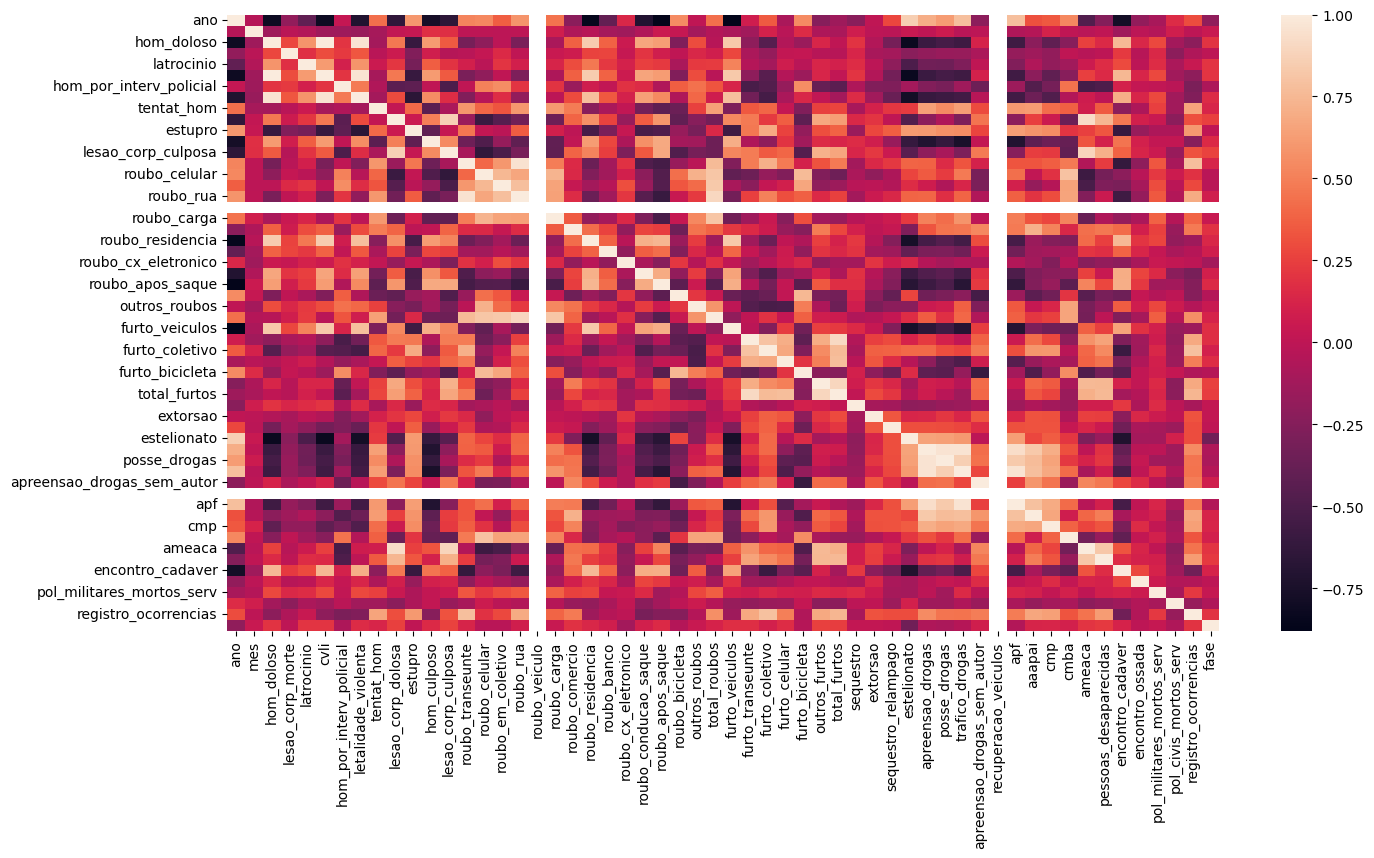

In [25]:
# Plot heatmap correlation
plt.figure(figsize = (16,8))
ax = sns.heatmap(data = seg_rj.select_dtypes(include = np.number).corr())

### Atividade 8: Selecione os dados apenas para o ano de 2020 e apenas as colunas `mês`, `hom_doloso, lesao_corp_morte, latrocinio, cvli, hom_por_interv_policial`, e `trafico_drogas`

In [26]:
seg_rj = seg_rj.query('ano == 2020')[['mes',
                                      'hom_doloso',
                                      'lesao_corp_morte', 
                                      'latrocinio', 
                                      'cvli', 
                                      'hom_por_interv_policial',
                                      'trafico_drogas']]

In [27]:
seg_rj

,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,trafico_drogas
204,1,2.07,0.02,0.05,2.14,0.90,5.06
205,2,1.88,0.01,0.06,1.95,0.95,5.06
206,3,2.16,0.01,0.05,2.22,0.66,4.70
207,4,1.80,0.03,0.03,1.86,1.03,5.29
208,5,1.57,0.00,0.03,1.61,0.75,5.39
209,6,1.49,0.01,0.01,1.52,0.20,4.71
210,7,1.48,0.02,0.04,1.54,0.30,5.15
211,8,1.50,0.01,0.07,1.58,0.29,5.28
212,9,1.37,0.02,0.04,1.43,0.31,5.12
213,10,1.59,0.01,0.03,1.63,0.83,5.23


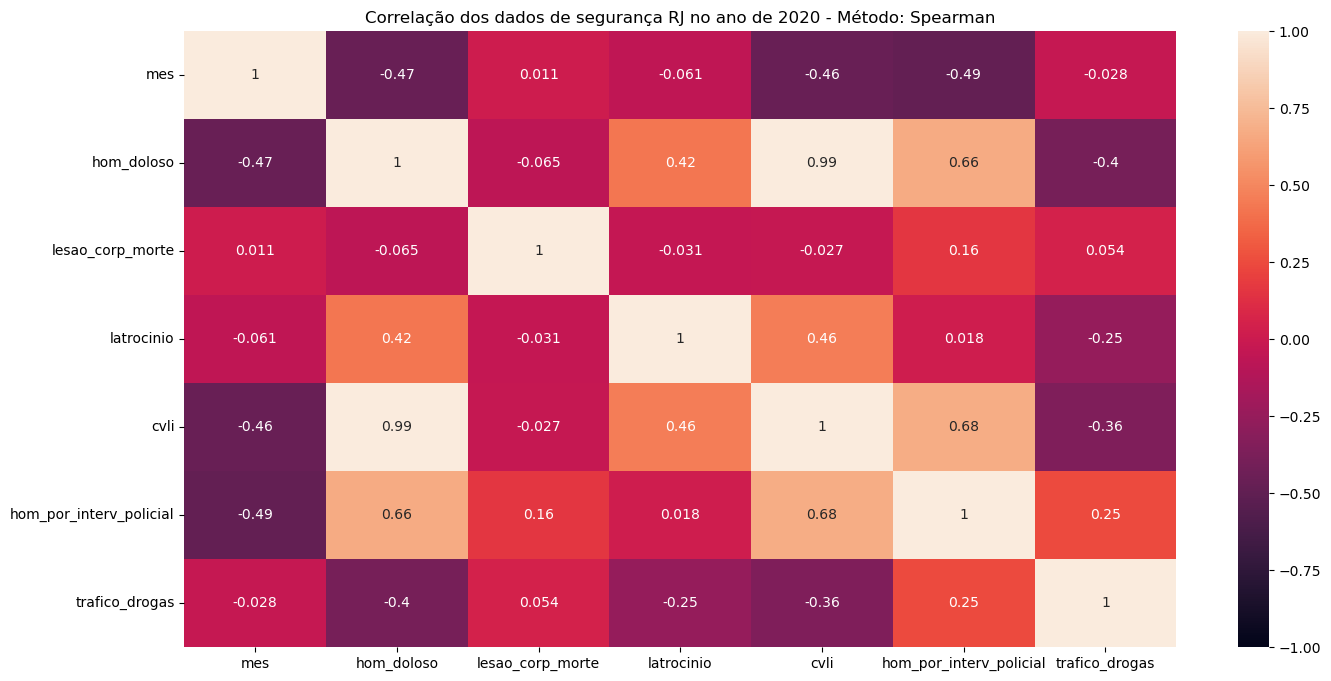

In [29]:
# Correlação metodo spearman
plt.figure(figsize = (16,8))
ax = sns.heatmap(data = seg_rj.corr(method = 'spearman'), annot = True , vmax=1, vmin=-1)
ax.set(title = 'Correlação dos dados de segurança RJ no ano de 2020 - Método: Spearman')
plt.show()

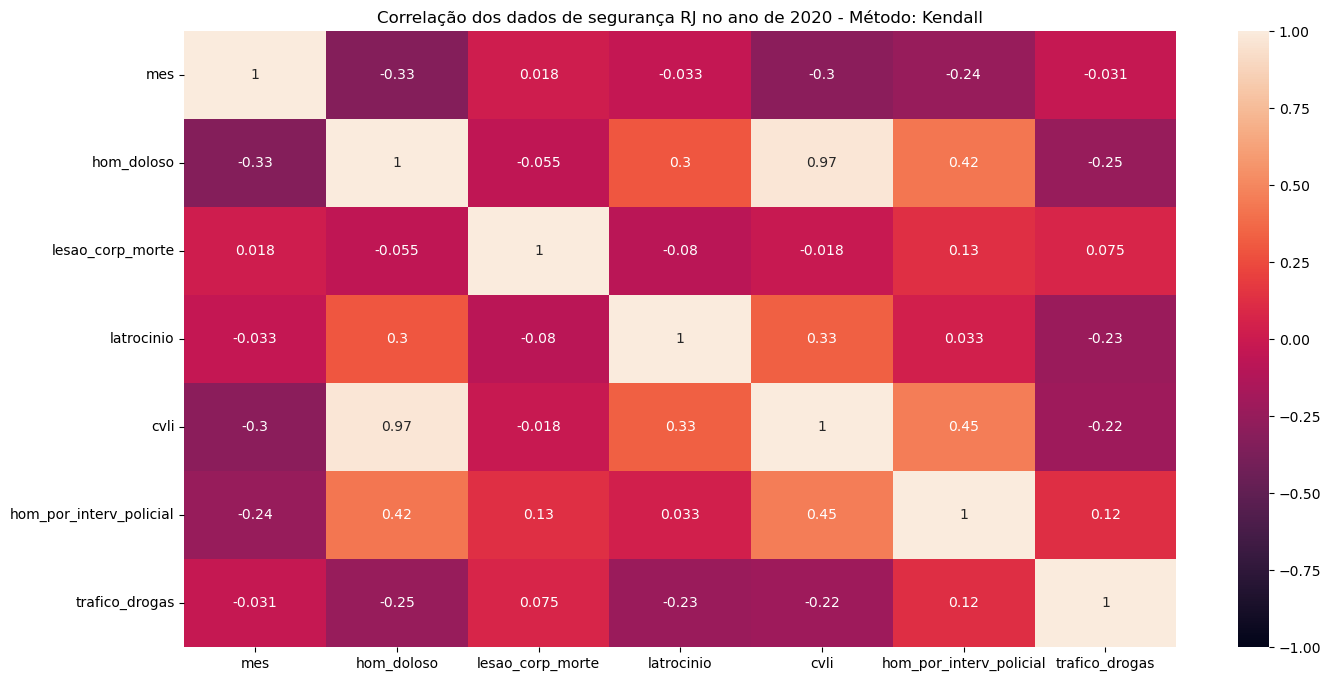

In [30]:
# Correlação metodo kendall
plt.figure(figsize = (16,8))
ax = sns.heatmap(data = seg_rj.corr(method = 'kendall'), annot = True , vmax=1, vmin=-1)
ax.set(title = 'Correlação dos dados de segurança RJ no ano de 2020 - Método: Kendall')
plt.show()

* Variáveis `hom_doloso`  e `cvli` possuem uma correlação muito forte.
* Variáveis `hom_por_interv_policial`, `hom_doloso` e `cvli` possuem correlação moderada.
* As demais variáveis possuem correlação fraca ou bem fraca
